<a href="https://colab.research.google.com/github/yelosolutions/Machine-Learning/blob/main/Insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependancies

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data collection 

In [4]:
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [5]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance_dataset.shape

(1338, 7)

In [8]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [11]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Categorical features - 'sex','smoker','region'

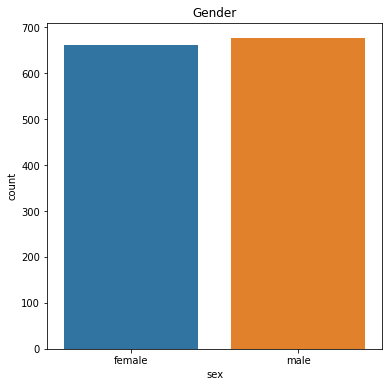

In [12]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = insurance_dataset)
plt.title('Gender')
plt.show()

In [16]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

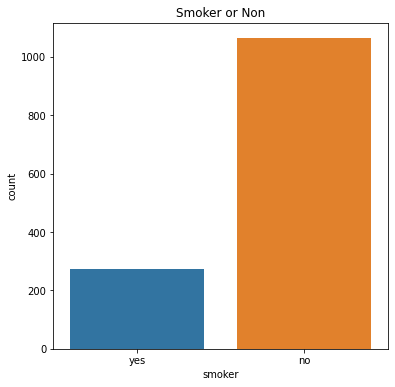

In [13]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = insurance_dataset)
plt.title('Smoker or Non')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

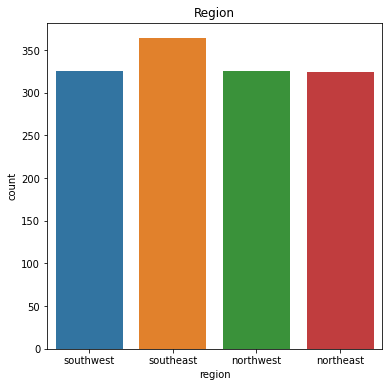

In [15]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = insurance_dataset)
plt.title('Region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

Children

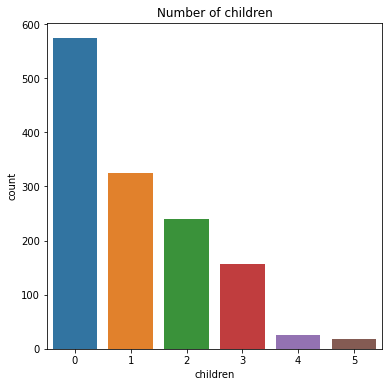

In [18]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = insurance_dataset)
plt.title('Number of children')
plt.show()

Value Features = 'age','bmi','charges'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


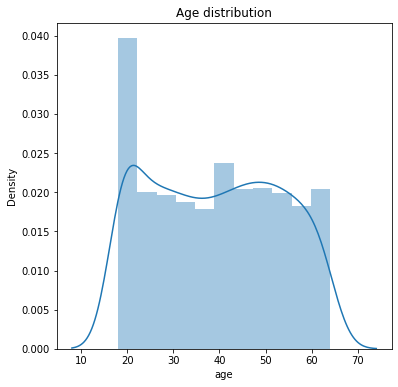

In [17]:
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


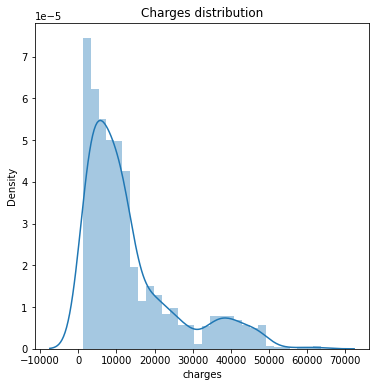

In [20]:
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


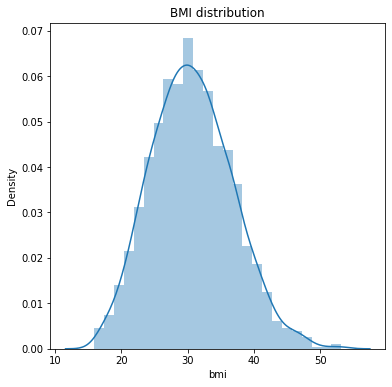

In [19]:
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show()

Categorical features encoding

In [22]:
insurance_dataset.replace({'sex':{'male': 0 ,'female': 1}}, inplace = True)

In [23]:
insurance_dataset.replace({'smoker':{'yes': 0 ,'no': 1}}, inplace = True)

In [27]:
#insurance_dataset.replace({'region':{'southeast'; 0 ,'southwest'; 1 , 'northeast'; 2 ,'northwest'; 3}})

SyntaxError: ignored